# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [72]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [73]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fort bragg
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | itamaraca
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | uttaradit
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | chernyshevskiy
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | callao
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | onokhoy
Processing Record 15 of Set 1 | vadso
Processing Record 16 of Set 1 | tarauaca
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | sishilichengzi
City not found. Skipping...
Processing Record 20 of Set 1 | luganville
Processing Record 21 of Set 1 | fabero
Processing Record 22 of

In [74]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [75]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fort bragg,35.1390,-79.0060,42.82,63,0,8.05,US,1704726703
1,ilulissat,69.2167,-51.1000,15.82,67,75,14.97,GL,1704726703
2,itamaraca,-7.7478,-34.8256,89.65,60,7,11.43,BR,1704726703
3,adamstown,-25.0660,-130.1015,73.98,82,100,12.50,PN,1704726704
4,ushuaia,-54.8000,-68.3000,49.62,89,100,6.35,AR,1704726704


In [76]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [77]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort bragg,35.1390,-79.0060,42.82,63,0,8.05,US,1704726703
1,ilulissat,69.2167,-51.1000,15.82,67,75,14.97,GL,1704726703
2,itamaraca,-7.7478,-34.8256,89.65,60,7,11.43,BR,1704726703
3,adamstown,-25.0660,-130.1015,73.98,82,100,12.50,PN,1704726704
4,ushuaia,-54.8000,-68.3000,49.62,89,100,6.35,AR,1704726704


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

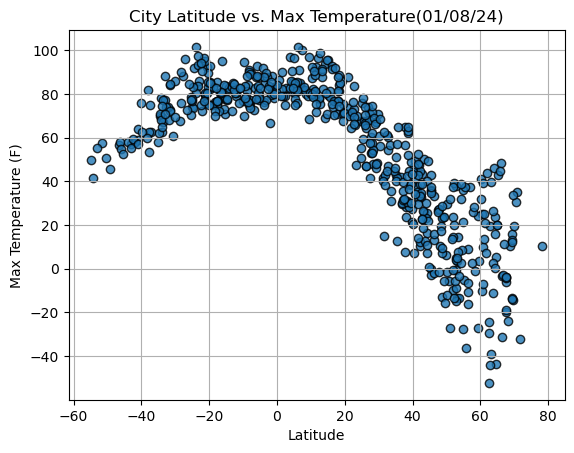

In [78]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'], 
            edgecolor="black", linewidth=1, marker="o", 
            alpha=.8, label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
          
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

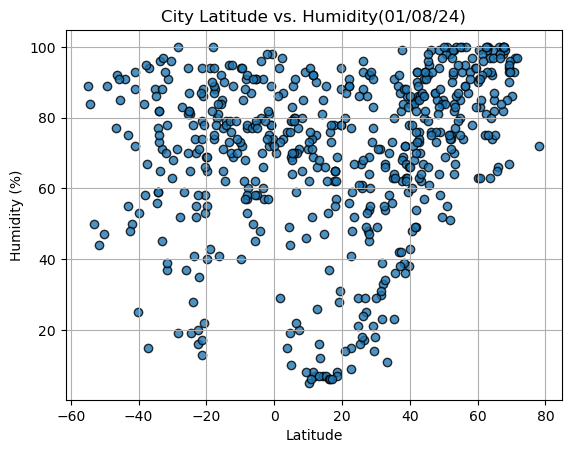

In [79]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],
            city_data_df['Humidity'],
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
          
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

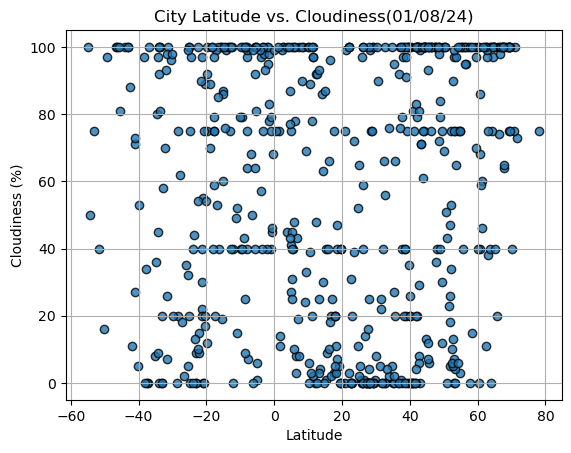

In [80]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],
            city_data_df['Cloudiness'],
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

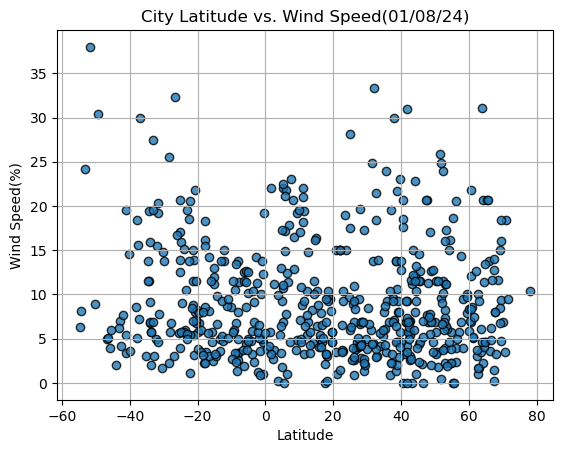

In [81]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],
            city_data_df['Wind Speed'],
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [100]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values,y_values,ylabel,text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = slope * x_values + intercept
    line_eq = "y =" + str(round(slope,2)) + "x+ " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    rsquared = rvalue ** 2
    print(f"The r-squared is: {rsquared}")
    plt.show()

In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort bragg,35.1390,-79.0060,42.82,63,0,8.05,US,1704726703
1,ilulissat,69.2167,-51.1000,15.82,67,75,14.97,GL,1704726703
5,uttaradit,17.6667,100.5000,71.02,62,3,2.13,TH,1704726704
7,chernyshevskiy,63.0128,112.4714,-39.21,100,38,1.72,RU,1704726705
8,olonkinbyen,70.9221,-8.7187,34.93,97,100,18.45,SJ,1704726705


In [101]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,itamaraca,-7.7478,-34.8256,89.65,60,7,11.43,BR,1704726703
3,adamstown,-25.0660,-130.1015,73.98,82,100,12.50,PN,1704726704
4,ushuaia,-54.8000,-68.3000,49.62,89,100,6.35,AR,1704726704
6,papatowai,-46.5619,169.4708,56.62,77,100,5.01,NZ,1704726704
9,blackmans bay,-43.0167,147.3167,57.33,75,100,6.96,AU,1704726705


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7534919649047721


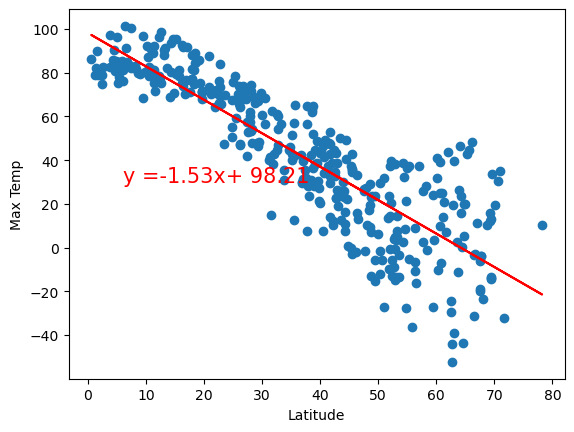

In [102]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.42128714793223926


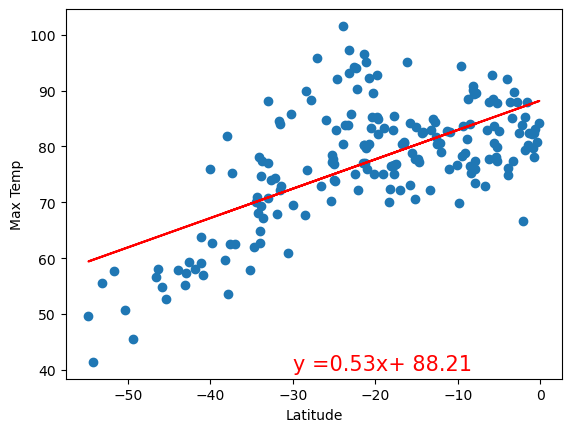

In [103]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship: For the Northern Hemisphere, the negative slope indicates that as latitude increases (moving towards the North Pole), the maximum temperature tends to decrease. The strength of this negative association is moderately strong, as indicated by the steepness of the slope in the regression equation. The fairly high R-squared value of .753 indicates that the relationship between Max Temp and latitude is fairly well-captured by the linear model. For the Southern Hempisphere, the positive coefficient of .53 for the latitude indicates a moderate positive correlation with maximum temperature. As latitide increases (moving towards the South Pole), the maximum temperature also tends to increase. The R-squared isn't as high as it is for for the Northern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.2207687050761346


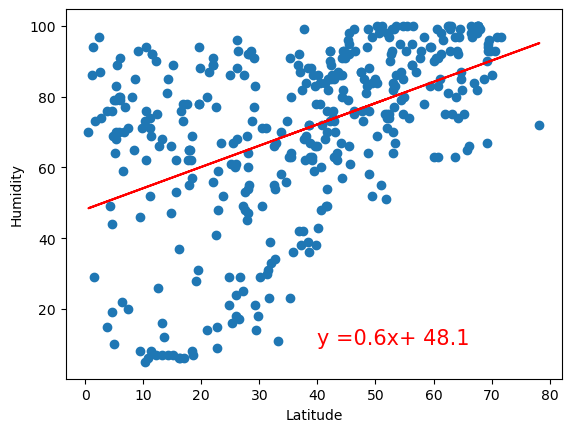

In [104]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (40,10))

The r-squared is: 0.009644442493657967


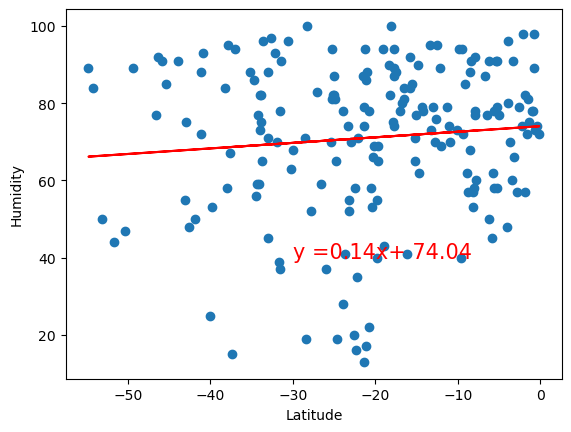

In [105]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,40))

**Discussion about the linear relationship:** For the Northern Hempisphere, the positive coefficient of .6 indicates that as you move north to a higher latitude, the humidity tends to increase. The r squared value of .22 indicates that the linear regression model explains about 22% of the variability in humidity. For the Southern Hemisphere, the positive slope (.14) indicates a positive correlation between latitude and humidity, however the slope is considerably smaller compared to the Northern Hemisphere. The r squared value suggests a weaker relationship between humidity and latitude compared to the Northern Hemisphere. In both cases, the correlations are relatively or very weak, suggesting that latitude alone may not be a strong predictor of humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.06909501794028135


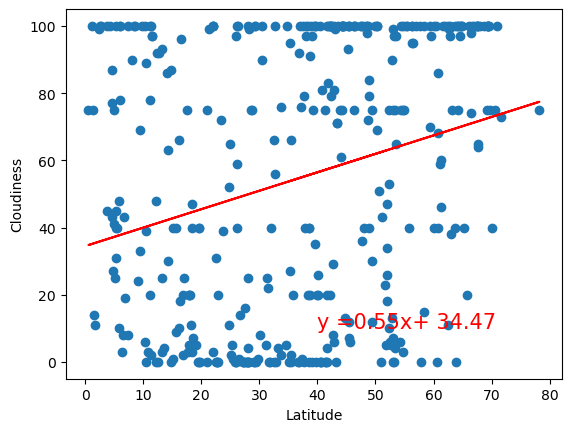

In [110]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.016884309992198702


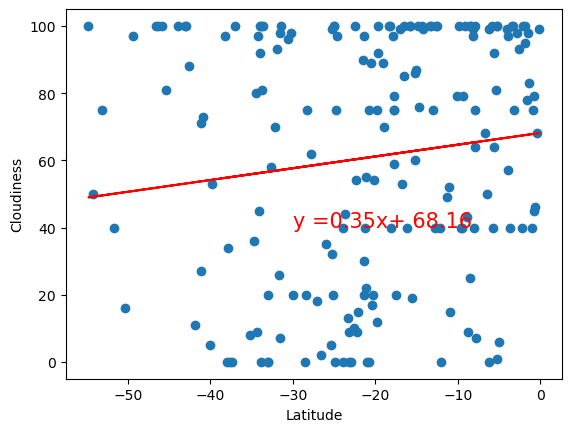

In [111]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,40))

**Discussion about the linear relationship:** Both hemispheres show positive correlations between latitude and cloudiness, but the relationships are weak. The r-squared values reinfornce the weak relationships, suggesting that latitude alone is not a strong predictor of cloudiness in either hemisphere. Cloudiness is likely influenced by various factors beyond latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0008504398056345955


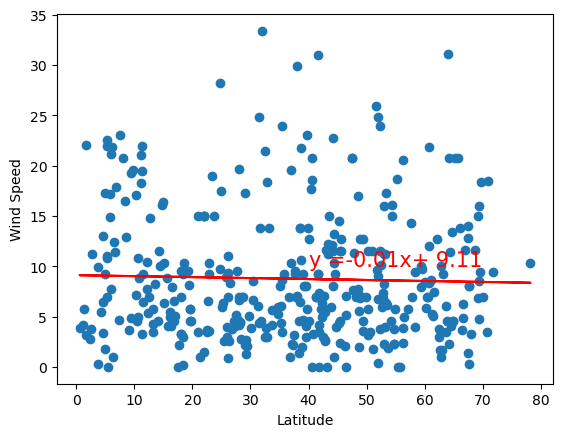

In [108]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,10))

The r-squared is: 0.06563492485876928


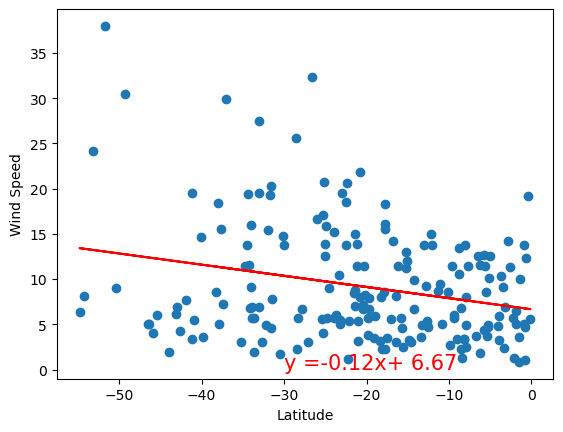

In [109]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,0))

**Discussion about the linear relationship:** For the Northern Hemisphere, the extremely low r-squared value indicates that the linear model only explains a very small proportion of the variability (.085%) in wind speed based on latitude. The slope is near zero, almost flat, indicating the lack of a substantial correlation. For the Southern Hemisphere, the r-squared value suggests that the linear model accounts for about 6.56% of the variability in wind speed. The negative slope indicates a slightly stronger negative correlation in the Southern Hemisphere. As latitude increases, wind speed tends to increase, howveer the r-squared value still suggests a relatively weak relationship. In both hemispheres, latitude alone is not a strong predictor of wind speed. 